## ПРАКТИЧНА РОБОТА 6.2

### Варіант 15

##### Завдання 2. Визначення важливих ознак Завдання полягає в тому, щоб з використанням алгоритмів SVM  і  Random Forest  визначити  важливі ознаки в наборі даних.  

Необхідно передбачити, чи має пацієнт рак грудей або ні на основі ознак. 

Використати датасет "Breast Cancer" (рак грудей) з бібліотеки scikit-learn для визначення важливих ознк.  ьтатиорівняти результати  порівняти результати 

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Завантажити набір даних. 
cancer = datasets.load_breast_cancer()

print(cancer)
print(cancer.DESCR)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
#Розділити дані на тренувальний та тестовий набори.
X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train)
print(y_train)

[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
[1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 

In [4]:
#Застосувати SVM і Random Forest для визначення важливих ознак. 
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train, y_train)

rf_importance = rf_clf.feature_importances_
print(rf_importance)

[0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


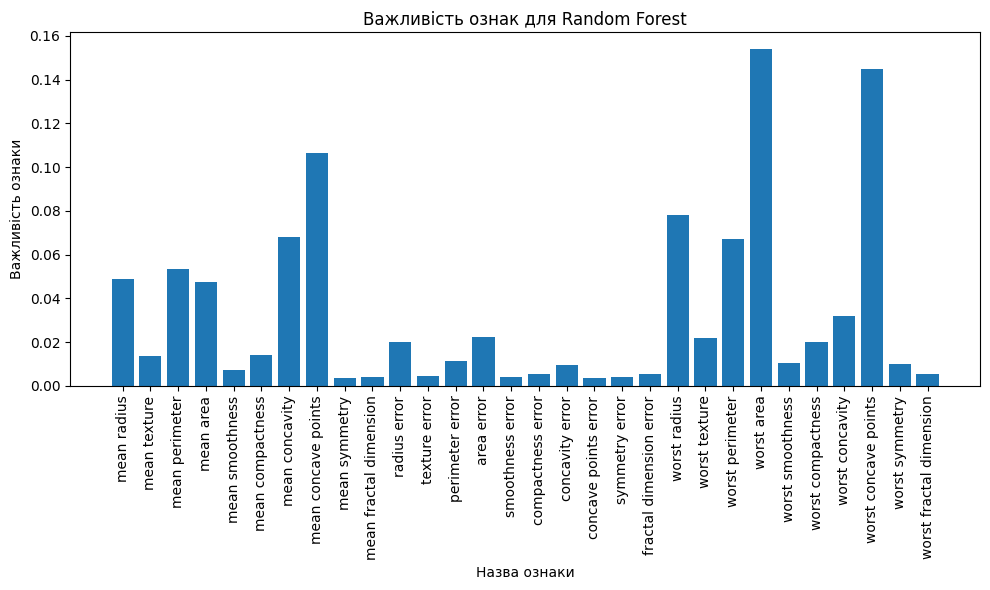

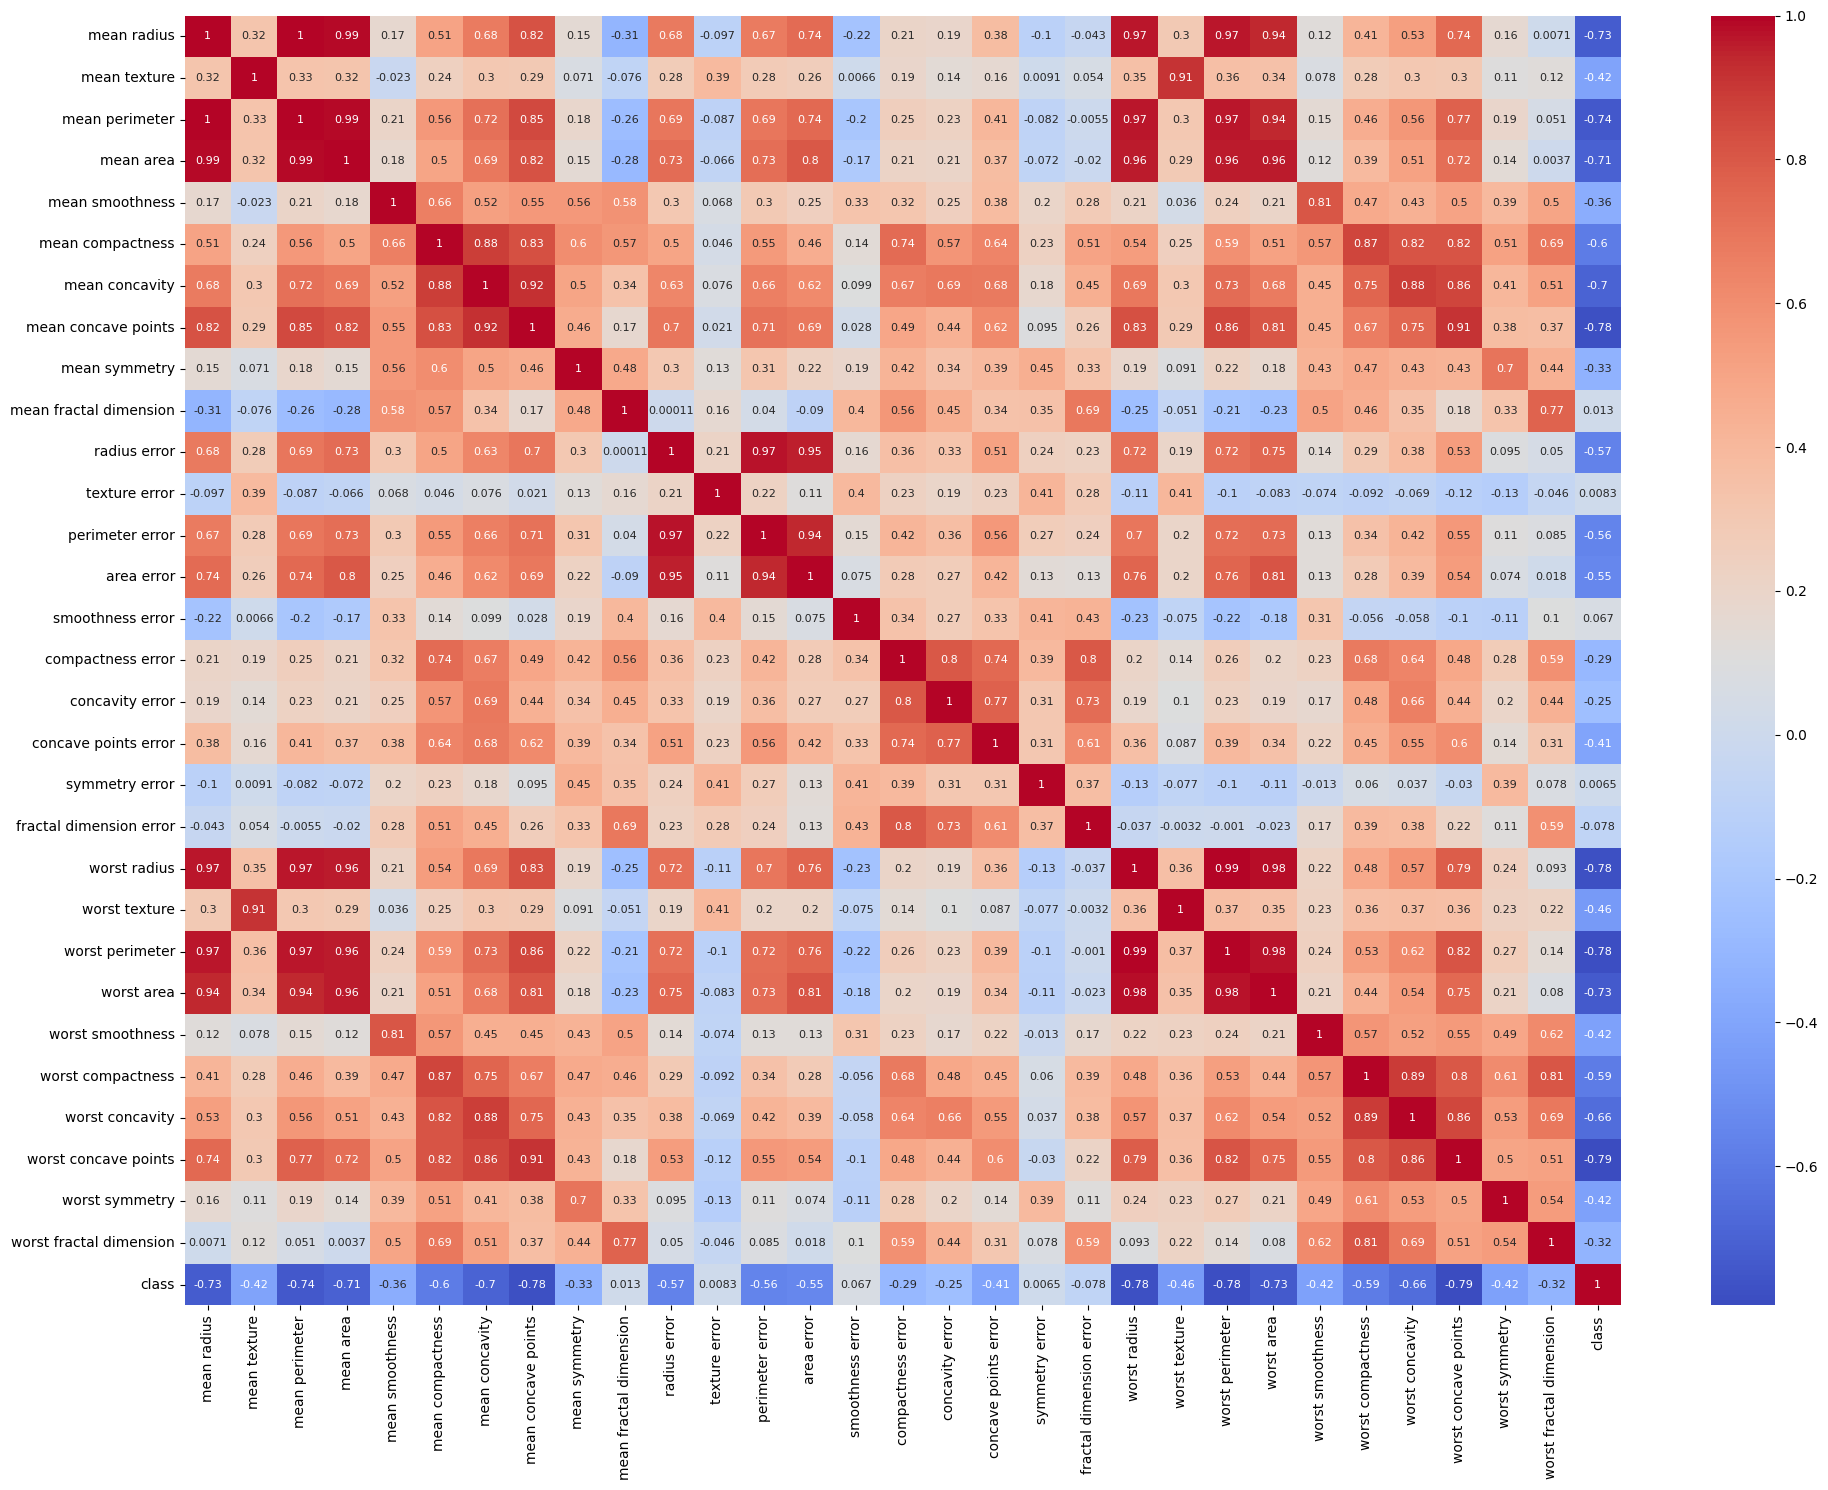

In [5]:
#Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі. 
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_importance)), rf_importance)
plt.xticks(range(len(rf_importance)), cancer.feature_names, rotation=90)
plt.xlabel("Назва ознаки")
plt.ylabel("Важливість ознаки")
plt.title("Важливість ознак для Random Forest")
plt.tight_layout()
plt.show()

column_data = np.concatenate([cancer['data'], cancer['target'][:, None]], axis=1)
column_names = np.concatenate([cancer['feature_names'],["class"]])
df = pd.DataFrame(column_data, columns = column_names)
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, annot_kws={"fontsize": 8})
plt.tight_layout()
plt.show()

###### Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані. 
Отже, з графіку та таблиці можна побачити, що найбільше на рак грудей вливають такі ознаки, як: worst area, worst concave points, mean concave points.

In [6]:
#Обчислити точність для двох алгоритмів і порівняти результати 
clf_pred = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_pred)

rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Точність SVM: ", clf_accuracy)

print("Точність Random Forest: ", rf_accuracy)

if clf_accuracy > rf_accuracy:
    print("Отже, алгоритм SVM ефективніний за Random Forest на ", clf_accuracy - rf_accuracy)
elif clf_accuracy < rf_accuracy:
    print("Отже, алгоритм Random Forest ефективніний за SVM на ", rf_accuracy - clf_accuracy)
else:
    print("Отже, обидва алгоритма мають однакову точність")

Точність SVM:  0.956140350877193
Точність Random Forest:  0.9649122807017544
Отже, алгоритм Random Forest ефективніний за SVM на  0.00877192982456143


###### Висновок: Отже під час виконання завдання, я навчилася визначати важливі ознаки в наборі даних за допомогою алгоритмів Random Forest та SVM. Також навчилася визначати і порівнювати точність цих алгоритмів. Вдосконалила знання з побудови та аналізу графіків. 